In [10]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import glob
import os
from PIL import Image

In [11]:
from scipy.signal import butter, sosfilt, lfilter

def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [12]:
# FFT and Filtering parameters
band_freq_min=400
band_freq_max=10500
windowlength=512 # also equals to NFFT
N_overlap=400 # Overlap length in STFT 

Read the first data, to get Spectrogram dimensions

In [13]:
source_path='../data/train_data/audio/'
dest_path = '../data/train_data/spec/'

In [14]:
path = source_path + '0/' #Choose 0 for negative, 1 for positive

In [15]:
for audioFile in glob.glob(os.path.join(path, '*.wav')):
    (sig, rate) = librosa.load(audioFile, sr=22050, mono=True)
    filtered=butter_bandpass_filter(sig, band_freq_min, band_freq_max, fs=rate, order=1)
    f, t, Syy = signal.stft(filtered,fs=rate,window='hann',noverlap=N_overlap,nfft=windowlength,nperseg=windowlength)
    Syy=abs(Syy) * 33 #apply amplification
    Syy=20*np.log10(Syy/0.00002)
    Syy[Syy<0.0] = 0.0
    Syy = Syy / Syy.max() #normalize to [0, 1]
    
    Syy_8bit = (Syy * 255).astype(np.uint8)

    #img = Image.fromarray(array, mode='L')

    img = Image.fromarray(Syy_8bit)

    img = img.rotate(180)
    img_path = audioFile.replace("audio", "spec").replace("wav","png")
    img.save(img_path)

    

C:\Users\dgnhk\AppData\Local\Temp\ipykernel_7008\1104243613.py:6: RuntimeWarning: divide by zero encountered in log10
  Syy=20*np.log10(Syy/0.00002)
C:\Users\dgnhk\AppData\Local\Temp\ipykernel_7008\1104243613.py:8: RuntimeWarning: invalid value encountered in divide
  Syy = Syy / Syy.max() #normalize to [0, 1]


Flatten Spectrogram training data and write to csv file

Text(0.5, 0, 'Time [sec]')

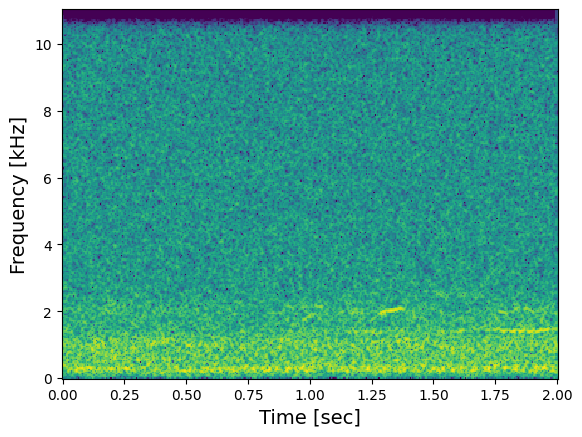

In [16]:
plt.pcolormesh(t[:],f[:]/1e3,Syy[:,:])
plt.ylabel('Frequency [kHz]', fontsize=14)
plt.xlabel('Time [sec]',fontsize=14)